In [230]:
import numpy as np
import pandas as pd

In [231]:
# Load the dataset from a CSV file
df = pd.read_csv(r"D:\DATA SCIENCE INTERNSHIP\dummy_startup_success_dataset.csv")
df

,domain_category,name,permalink,company_domain,founded_on,operating_status,team_size,num_rounds,total_funding_usd,avg_round_usd,num_founders,avg_founder_exits,tweet_count_last_7d,startup_age_days,has_ipo,has_acquisition,label
0,AI,ai-startup-001,ai-startup-001,aistartup001.com,2024-09-28,active,753,8,62443214.93,7805401.87,1,1.68,495,261,True,False,successful
1,AI,ai-startup-002,ai-startup-002,aistartup002.com,2024-09-11,active,71,4,22359672.16,5589918.04,2,2.12,185,278,False,True,successful
2,AI,ai-startup-003,ai-startup-003,aistartup003.com,2019-09-04,active,210,10,98011363.84,9801136.38,5,1.13,435,2112,True,False,successful
3,AI,ai-startup-004,ai-startup-004,aistartup004.com,2023-06-07,active,822,5,22835873.69,4567174.74,4,2.35,72,740,False,True,successful
4,AI,ai-startup-005,ai-startup-005,aistartup005.com,2024-11-17,active,913,8,13951619.83,1743952.48,3,2.32,134,211,True,False,successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Sustainability,sustainability-startup-096,sustainability-startup-096,sustainabilitystartup096.com,2022-05-06,closed,5,3,105872.07,35290.69,5,0.13,22,1137,False,False,unsuccessful
396,Sustainability,sustainability-startup-097,sustainability-startup-097,sustainabilitystartup097.com,2023-12-29,closed,34,1,1031573.75,1031573.75,4,0.58,46,535,False,False,unsuccessful
397,Sustainability,sustainability-startup-098,sustainability-startup-098,sustainabilitystartup098.com,2019-12-29,closed,27,1,1118729.50,1118729.50,4,0.19,48,1996,False,False,unsuccessful
398,Sustainability,sustainability-startup-099,sustainability-startup-099,sustainabilitystartup099.com,2023-01-13,closed,34,0,0.00,NaN,1,0.16,35,885,False,False,unsuccessful


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   domain_category      400 non-null    object 
 1   name                 400 non-null    object 
 2   permalink            400 non-null    object 
 3   company_domain       400 non-null    object 
 4   founded_on           400 non-null    object 
 5   operating_status     400 non-null    object 
 6   team_size            400 non-null    int64  
 7   num_rounds           400 non-null    int64  
 8   total_funding_usd    400 non-null    float64
 9   avg_round_usd        349 non-null    float64
 10  num_founders         400 non-null    int64  
 11  avg_founder_exits    400 non-null    float64
 12  tweet_count_last_7d  400 non-null    int64  
 13  startup_age_days     400 non-null    int64  
 14  has_ipo              400 non-null    bool   
 15  has_acquisition      400 non-null    boo

In [233]:
df.describe()

,team_size,num_rounds,total_funding_usd,avg_round_usd,num_founders,avg_founder_exits,tweet_count_last_7d,startup_age_days
count,400.000000,400.000000,4.000000e+02,3.490000e+02,400.000000,400.000000,400.000000,400.000000
mean,269.987500,4.130000,2.521037e+07,5.316253e+06,2.937500,1.238075,149.067500,1167.675000
std,318.183483,3.149269,3.098376e+07,5.581919e+06,1.408387,0.859714,153.731785,690.107811
min,1.000000,0.000000,0.000000e+00,3.529069e+04,1.000000,0.000000,0.000000,4.000000
25%,25.000000,2.000000,1.451498e+06,1.204731e+06,2.000000,0.527500,26.000000,580.250000
50%,50.000000,3.000000,4.744341e+06,3.033405e+06,3.000000,1.005000,52.000000,1194.500000
75%,503.000000,7.000000,4.830496e+07,8.274619e+06,4.000000,1.940000,273.250000,1775.250000
max,996.000000,10.000000,9.924174e+07,3.272734e+07,5.000000,2.980000,495.000000,2357.000000


In [234]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
domain_category         0
name                    0
permalink               0
company_domain          0
founded_on              0
operating_status        0
team_size               0
num_rounds              0
total_funding_usd       0
avg_round_usd          51
num_founders            0
avg_founder_exits       0
tweet_count_last_7d     0
startup_age_days        0
has_ipo                 0
has_acquisition         0
label                   0
dtype: int64


In [235]:
# fill missing values with the mean for numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2228\3010465375.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


In [236]:
# Check for missing values after filling
missing_values

domain_category         0
name                    0
permalink               0
company_domain          0
founded_on              0
operating_status        0
team_size               0
num_rounds              0
total_funding_usd       0
avg_round_usd          51
num_founders            0
avg_founder_exits       0
tweet_count_last_7d     0
startup_age_days        0
has_ipo                 0
has_acquisition         0
label                   0
dtype: int64

In [237]:

# Shape of the DataFrame
print("Shape of the DataFrame:", df.shape)


Shape of the DataFrame: (400, 17)


In [238]:
#Numerical columns
numerical_columns = df.select_dtypes(include=[np.number])
print("Numerical columns in the DataFrame:")
print(numerical_columns)


Numerical columns in the DataFrame:
     team_size  num_rounds  total_funding_usd  avg_round_usd  num_founders  \
0          753           8        62443214.93   7.805402e+06             1   
1           71           4        22359672.16   5.589918e+06             2   
2          210          10        98011363.84   9.801136e+06             5   
3          822           5        22835873.69   4.567175e+06             4   
4          913           8        13951619.83   1.743952e+06             3   
..         ...         ...                ...            ...           ...   
395          5           3          105872.07   3.529069e+04             5   
396         34           1         1031573.75   1.031574e+06             4   
397         27           1         1118729.50   1.118730e+06             4   
398         34           0               0.00   5.316253e+06             1   
399         50           0               0.00   5.316253e+06             2   

     avg_founder_exits  twe

In [239]:

# Categorical columns
categorical_columns = df.select_dtypes(include=[object])
print("Categorical columns in the DataFrame:")
print(categorical_columns)


Categorical columns in the DataFrame:
    domain_category                        name                   permalink  \
0                AI              ai-startup-001              ai-startup-001   
1                AI              ai-startup-002              ai-startup-002   
2                AI              ai-startup-003              ai-startup-003   
3                AI              ai-startup-004              ai-startup-004   
4                AI              ai-startup-005              ai-startup-005   
..              ...                         ...                         ...   
395  Sustainability  sustainability-startup-096  sustainability-startup-096   
396  Sustainability  sustainability-startup-097  sustainability-startup-097   
397  Sustainability  sustainability-startup-098  sustainability-startup-098   
398  Sustainability  sustainability-startup-099  sustainability-startup-099   
399  Sustainability  sustainability-startup-100  sustainability-startup-100   

             

In [240]:
# numerical features
numerical_features = numerical_columns.columns.tolist()
# categorical features
categorical_features = categorical_columns.columns.tolist()
# Display the numerical and categorical features
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['team_size', 'num_rounds', 'total_funding_usd', 'avg_round_usd', 'num_founders', 'avg_founder_exits', 'tweet_count_last_7d', 'startup_age_days']
Categorical features: ['domain_category', 'name', 'permalink', 'company_domain', 'founded_on', 'operating_status', 'label']


In [241]:
# duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows in the DataFrame:", duplicates)


Number of duplicate rows in the DataFrame: 0


In [242]:
# unique values in each categorical column
unique_values = {col: df[col].nunique() for col in categorical_columns.columns}
print("Unique values in each categorical column:")
print(unique_values)


Unique values in each categorical column:
{'domain_category': 4, 'name': 400, 'permalink': 400, 'company_domain': 400, 'founded_on': 370, 'operating_status': 2, 'label': 2}


In [243]:
for col in categorical_columns:
    print(f"\nUnique values in {col}:") #\n → Inserts a newline (moves text to a new line).f"" (f-string) → Allows embedding variables inside curly braces {}
    print(df[col].value_counts())


Unique values in domain_category:
domain_category
AI                100
FinTech           100
Biotech           100
Sustainability    100
Name: count, dtype: int64

Unique values in name:
name
sustainability-startup-084    1
sustainability-startup-083    1
sustainability-startup-082    1
sustainability-startup-081    1
sustainability-startup-080    1
                             ..
ai-startup-005                1
ai-startup-004                1
ai-startup-003                1
ai-startup-002                1
ai-startup-001                1
Name: count, Length: 400, dtype: int64

Unique values in permalink:
permalink
sustainability-startup-084    1
sustainability-startup-083    1
sustainability-startup-082    1
sustainability-startup-081    1
sustainability-startup-080    1
                             ..
ai-startup-005                1
ai-startup-004                1
ai-startup-003                1
ai-startup-002                1
ai-startup-001                1
Name: count, Length: 400

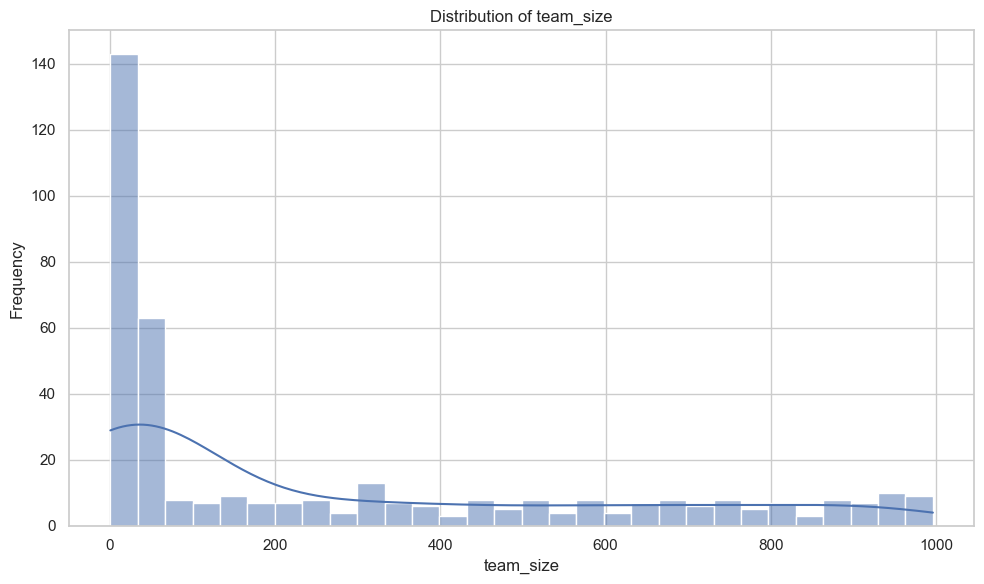

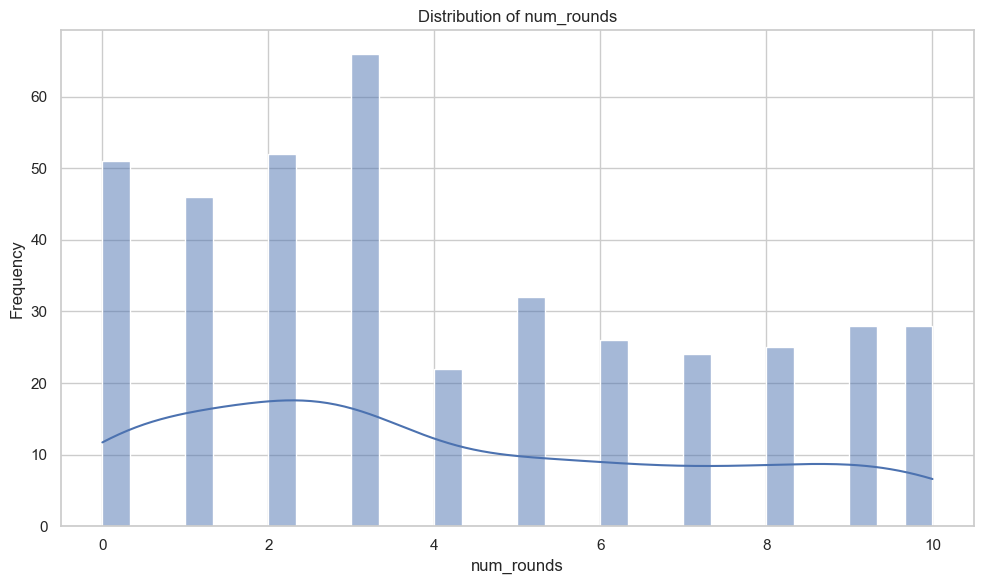

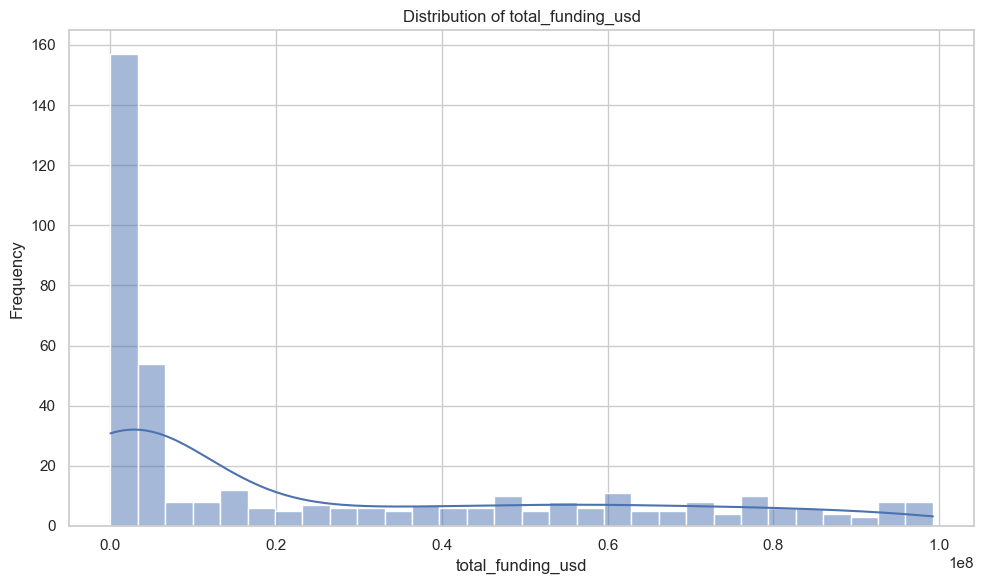

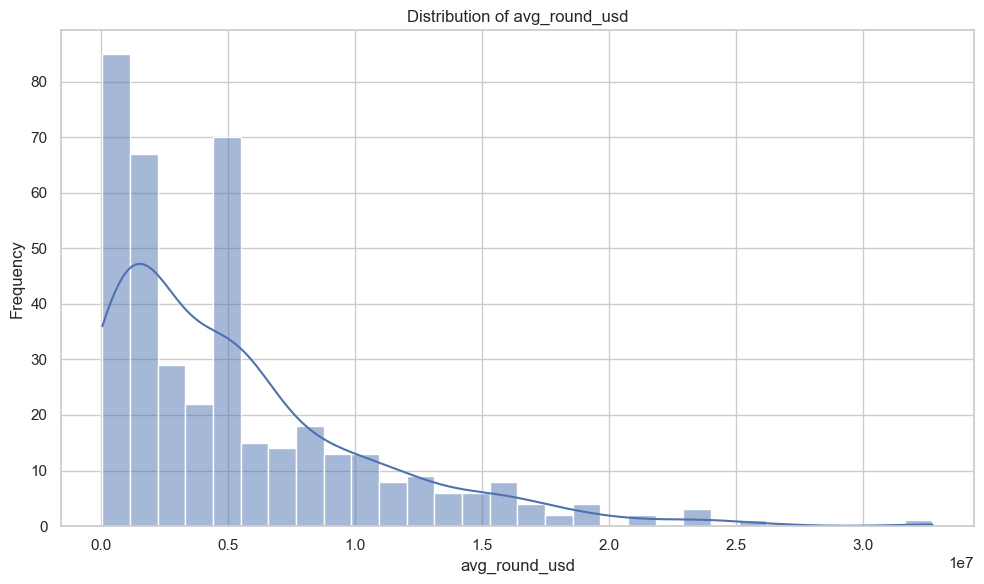

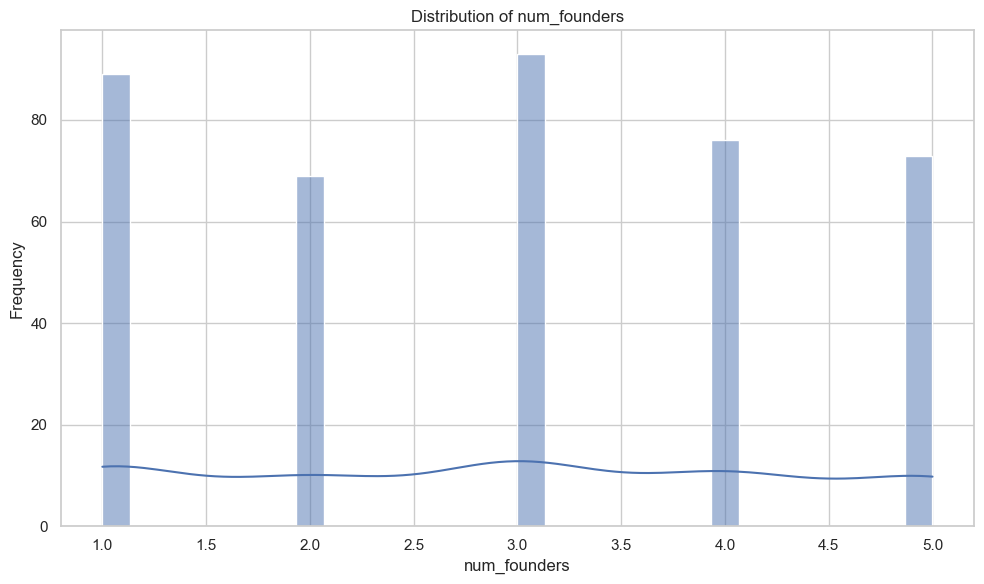

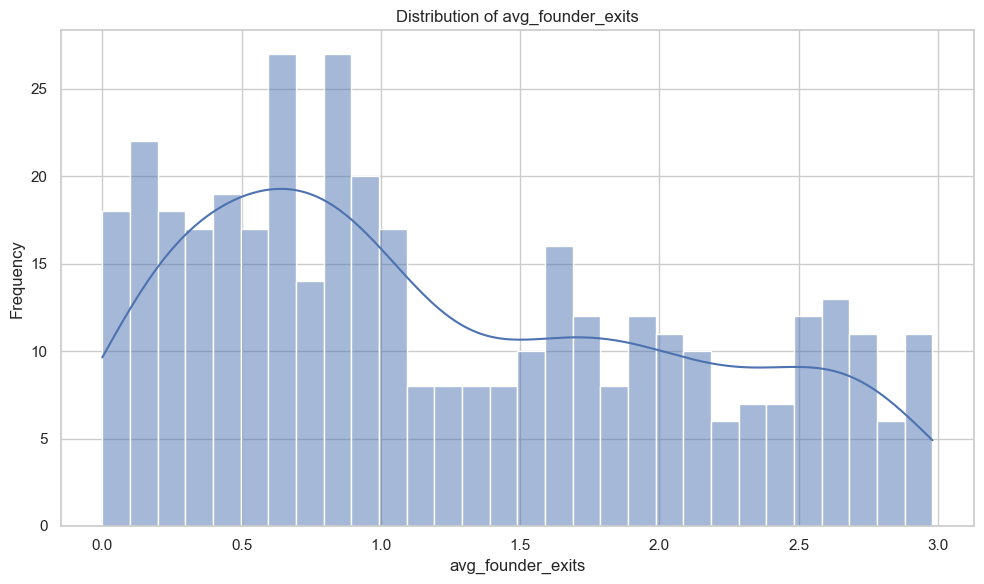

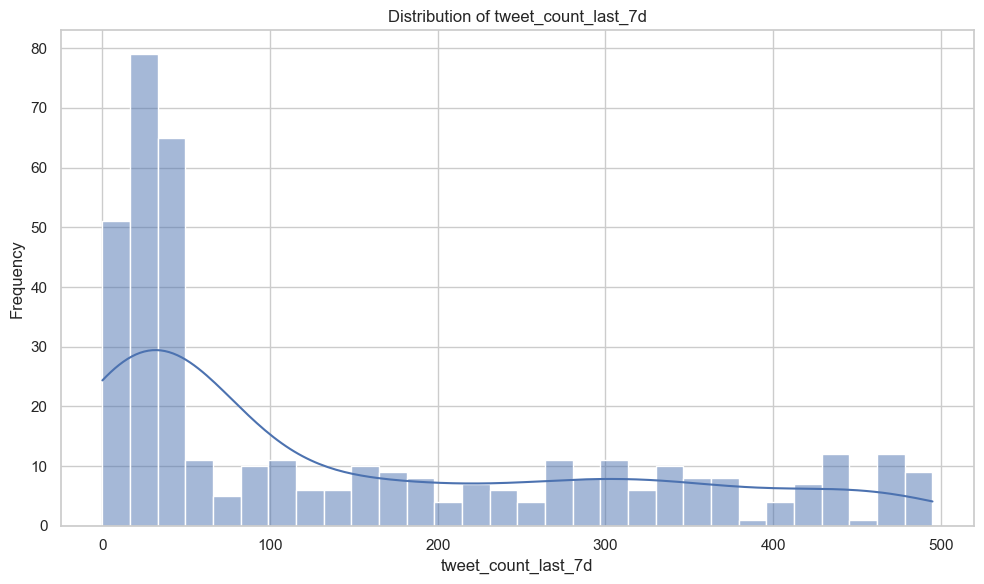

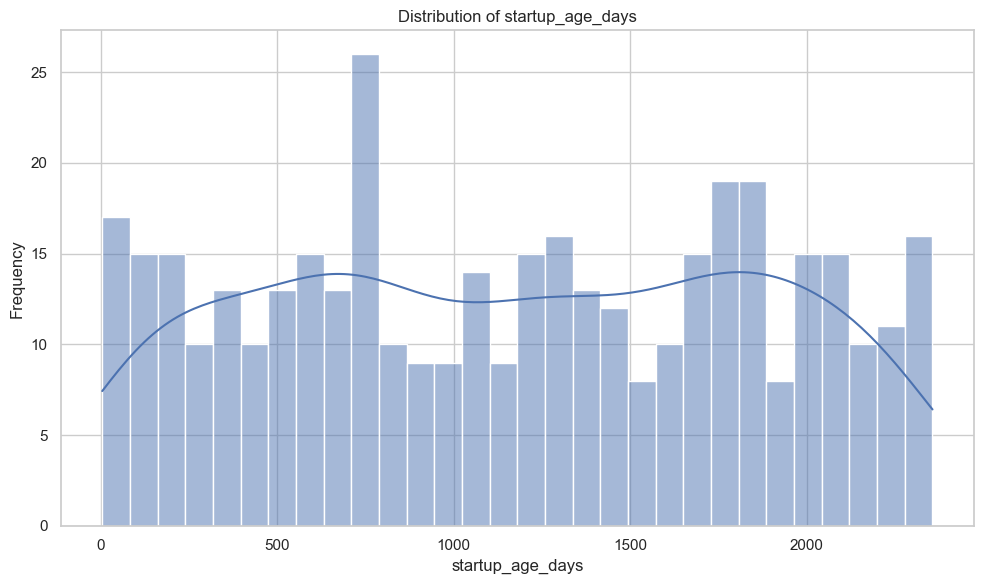

In [244]:
# univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
# Plotting numerical features
for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    

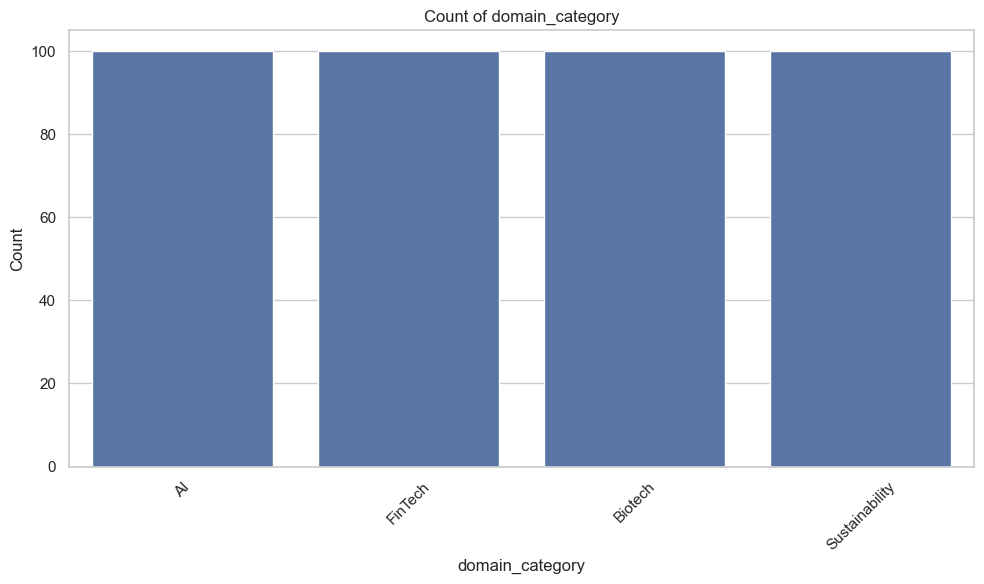

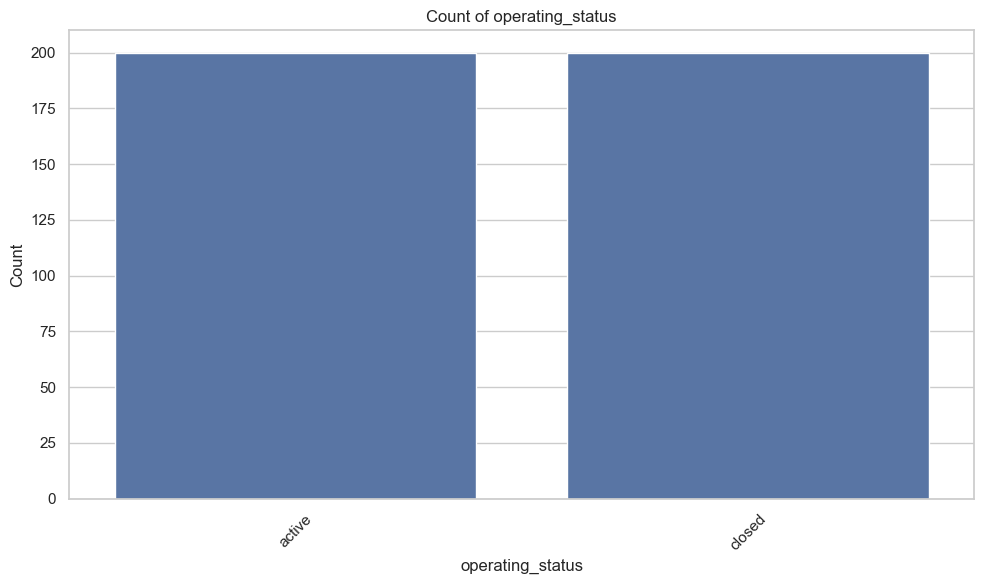

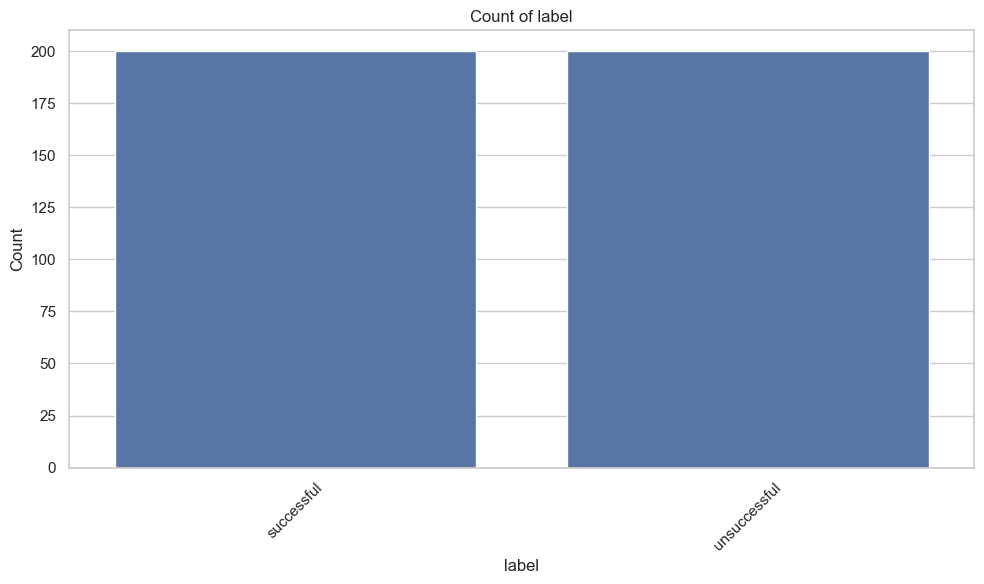

In [245]:
# categorical column plot for 'domain_category', 'operating_status', 'label'
for column in ['domain_category', 'operating_status', 'label']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


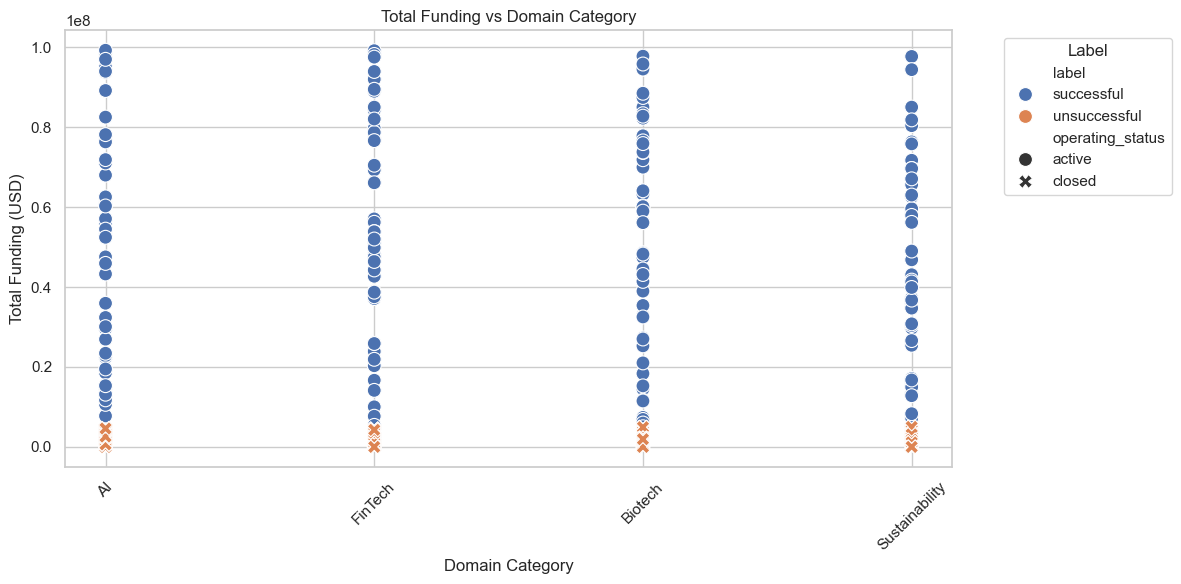

In [246]:
#bivariate analysis
# scatter plot for domain_category and total_funding_usd  
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='domain_category', y='total_funding_usd', hue='label', style='operating_status', s=100)
plt.title('Total Funding vs Domain Category')
plt.xlabel('Domain Category')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

    


In [247]:
#check if data is balanced
label_counts = df['label'].value_counts()
print("Label counts:")
print(label_counts)


Label counts:
label
successful      200
unsuccessful    200
Name: count, dtype: int64


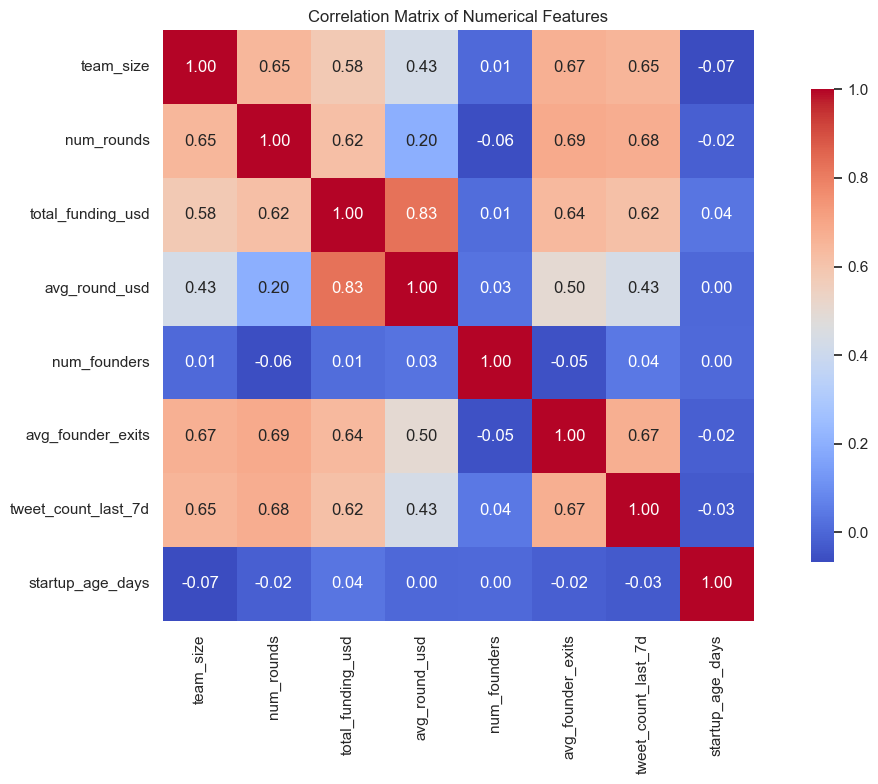

In [248]:
# Multivariate analysis
#corelation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()



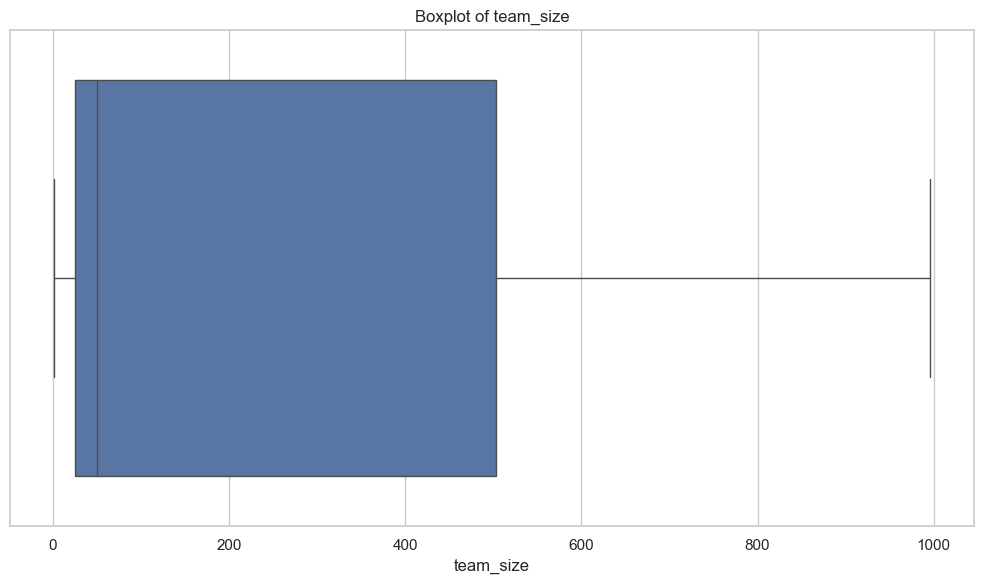

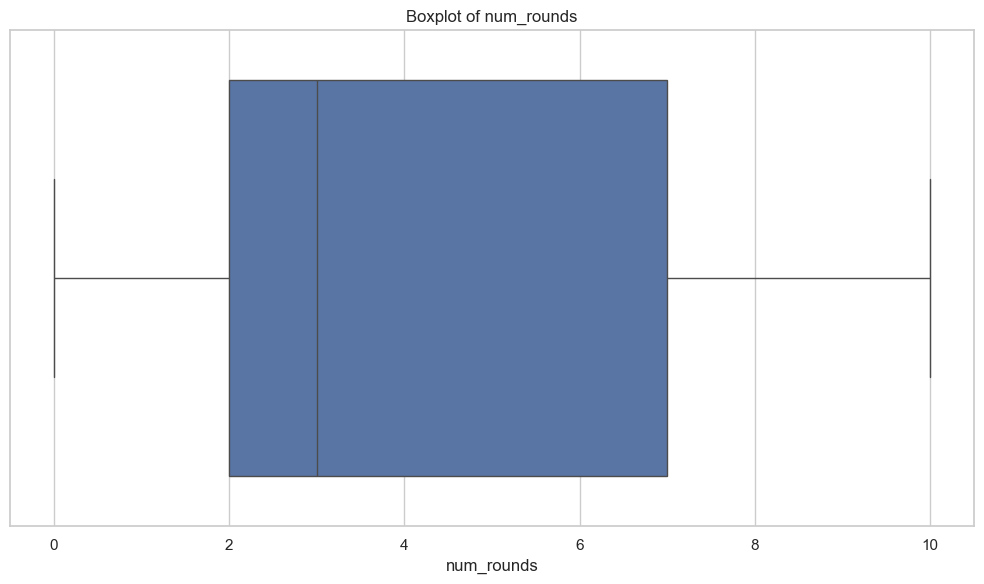

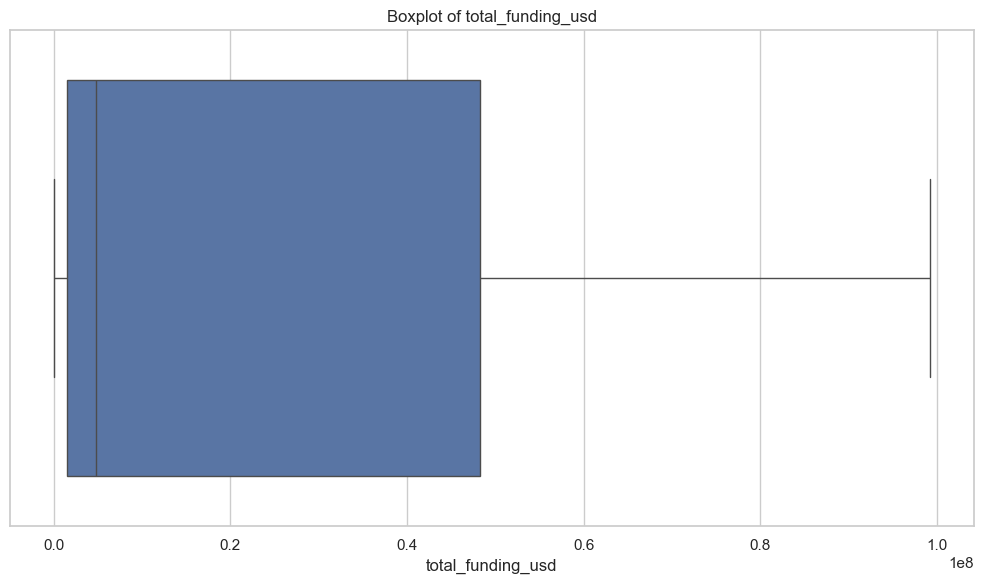

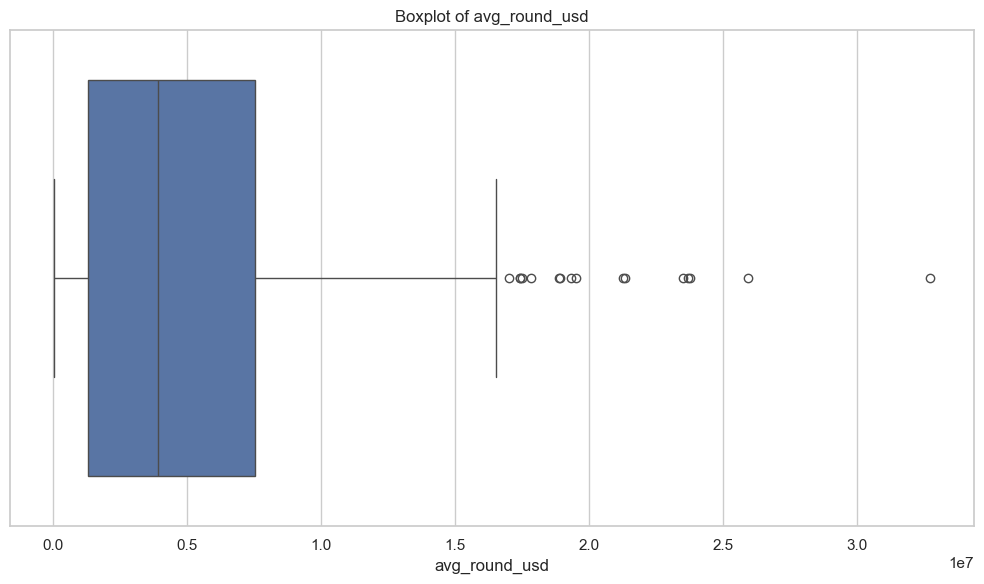

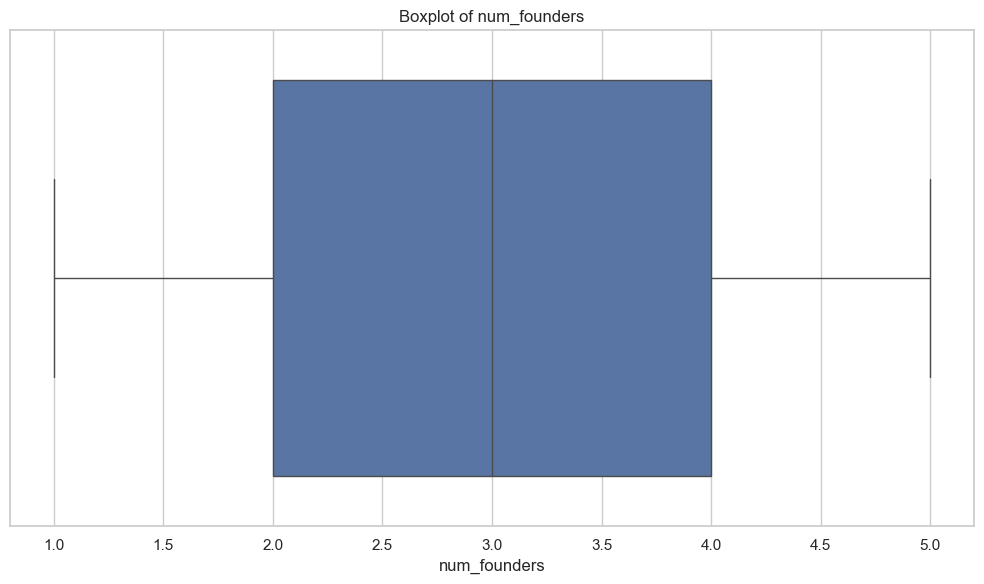

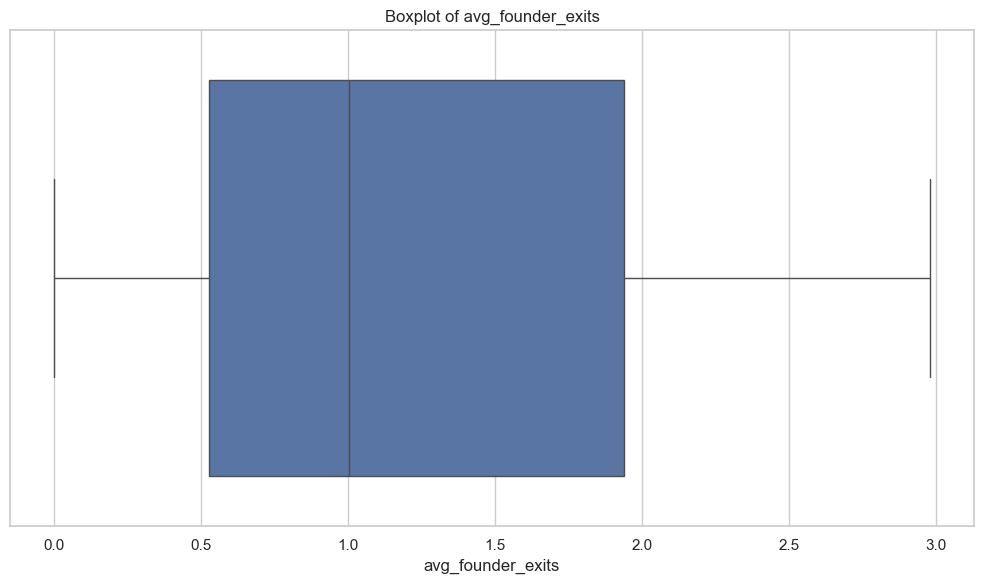

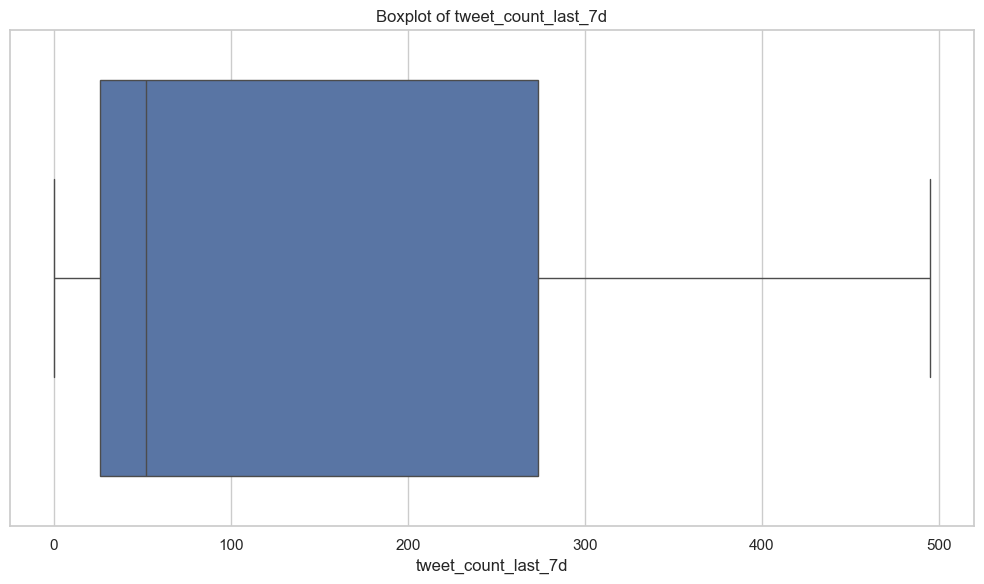

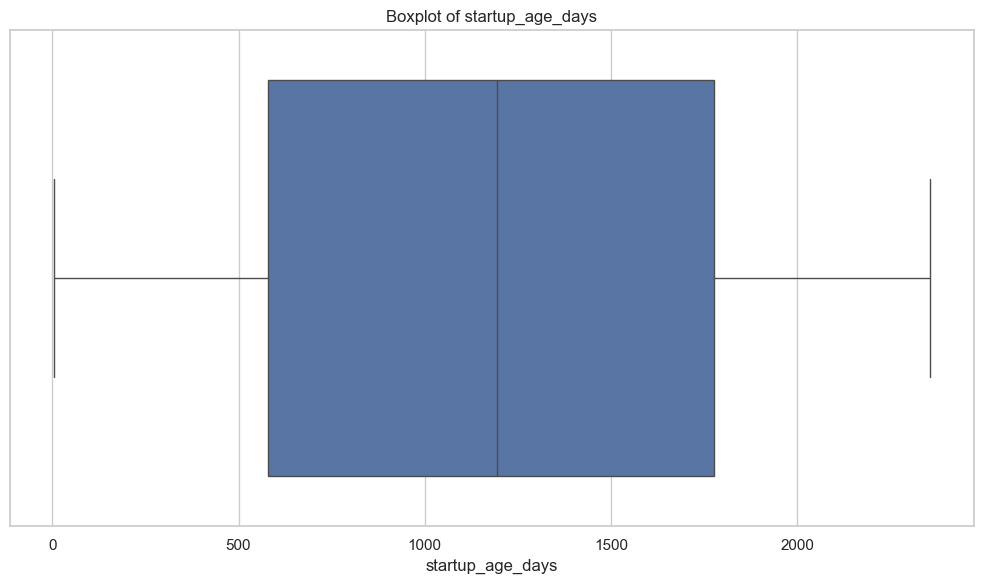

In [249]:
# outlier using boxplot
for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()
    

In [250]:
# outlier handling using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
# Remove outliers for each numerical feature
for column in numerical_features:
    df = remove_outliers_iqr(df, column)
# Check the shape of the DataFrame after outlier removal
print("Shape of the DataFrame after outlier removal:", df.shape)


Shape of the DataFrame after outlier removal: (384, 17)


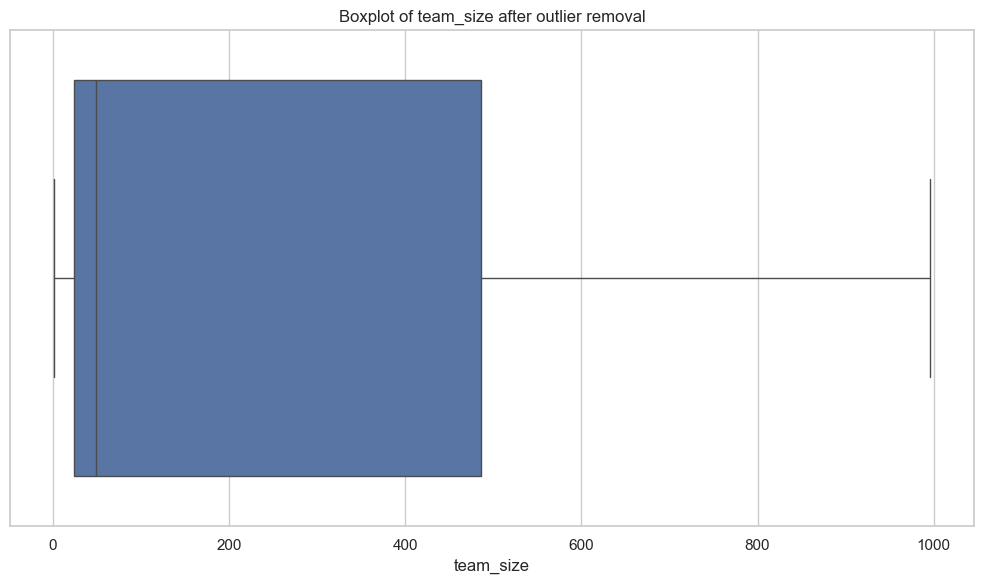

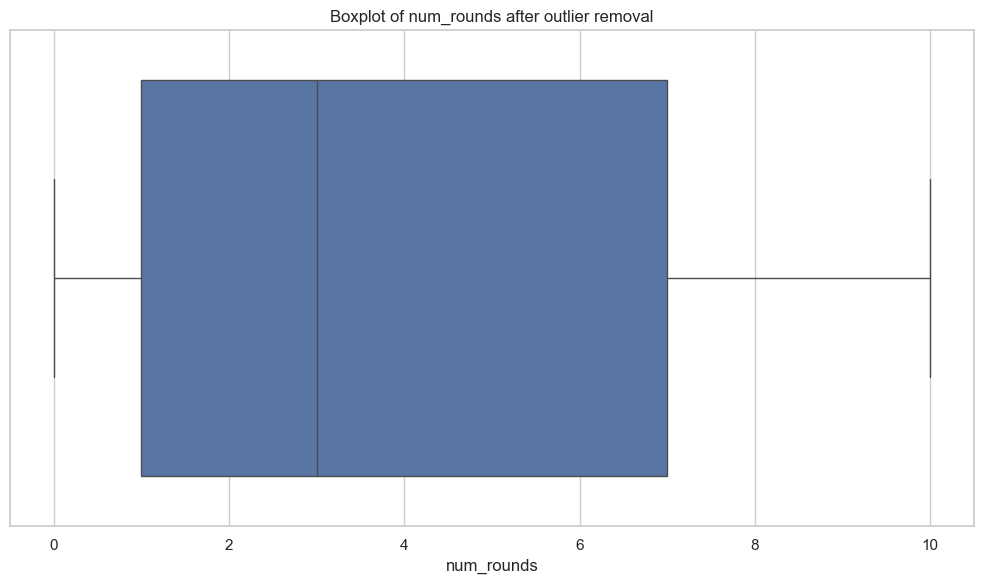

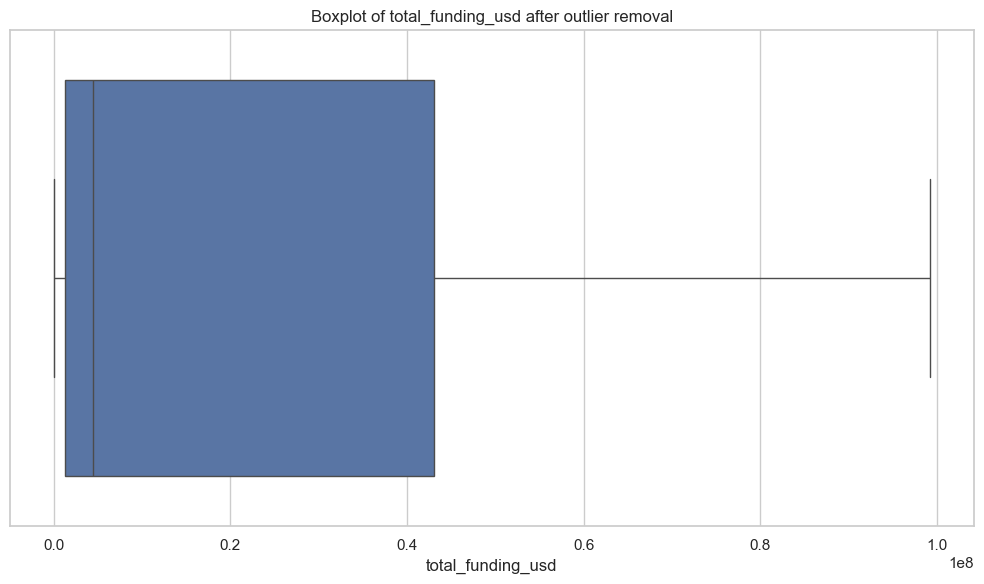

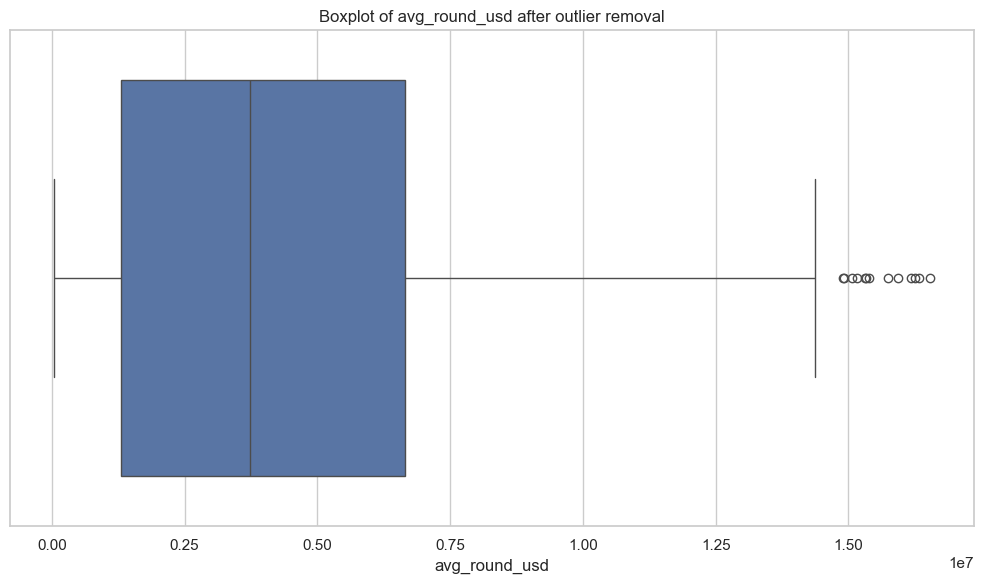

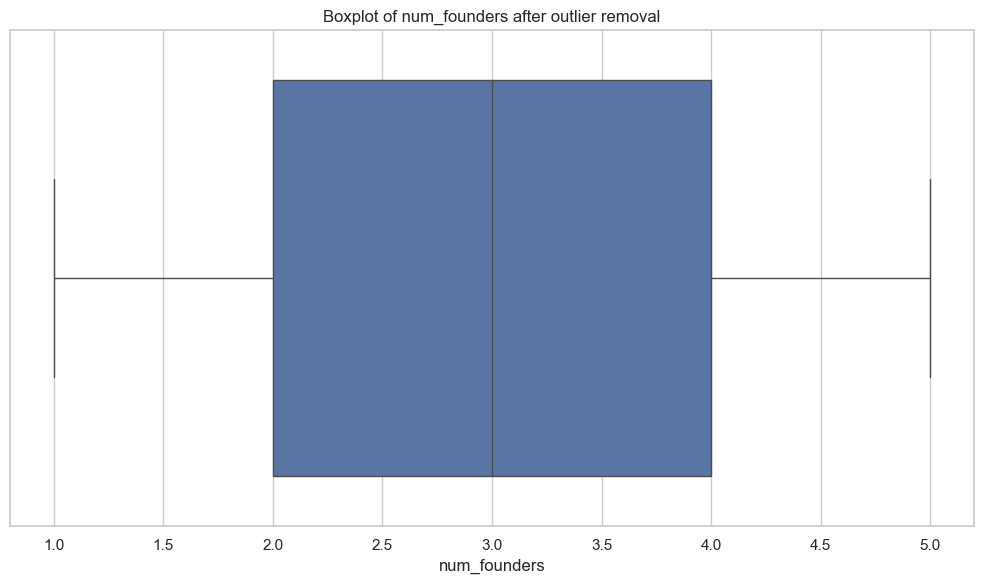

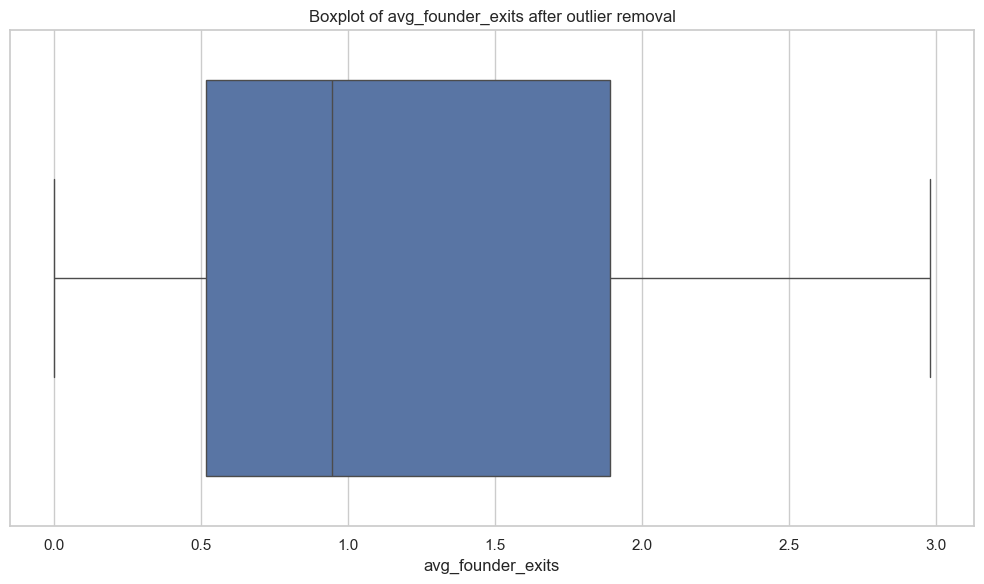

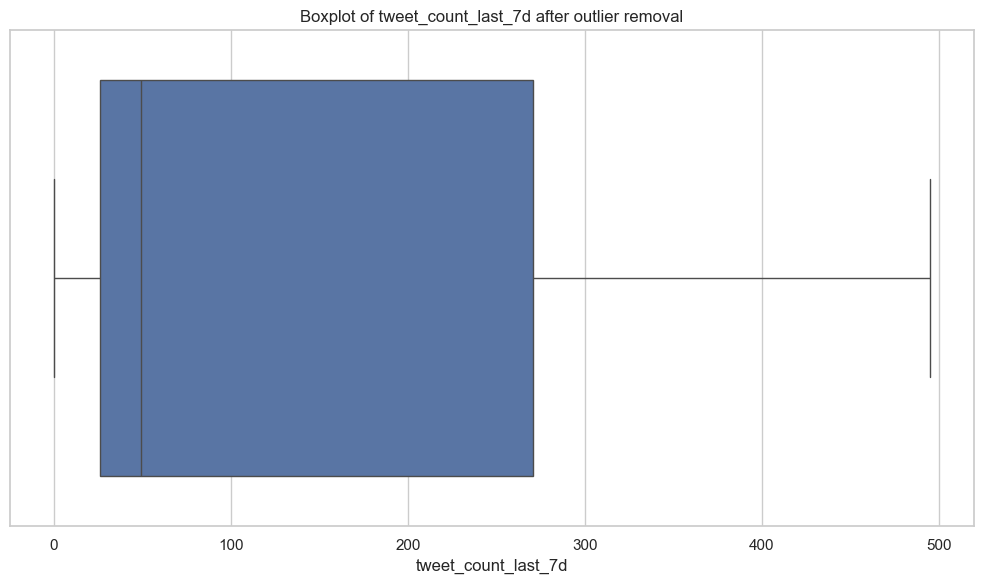

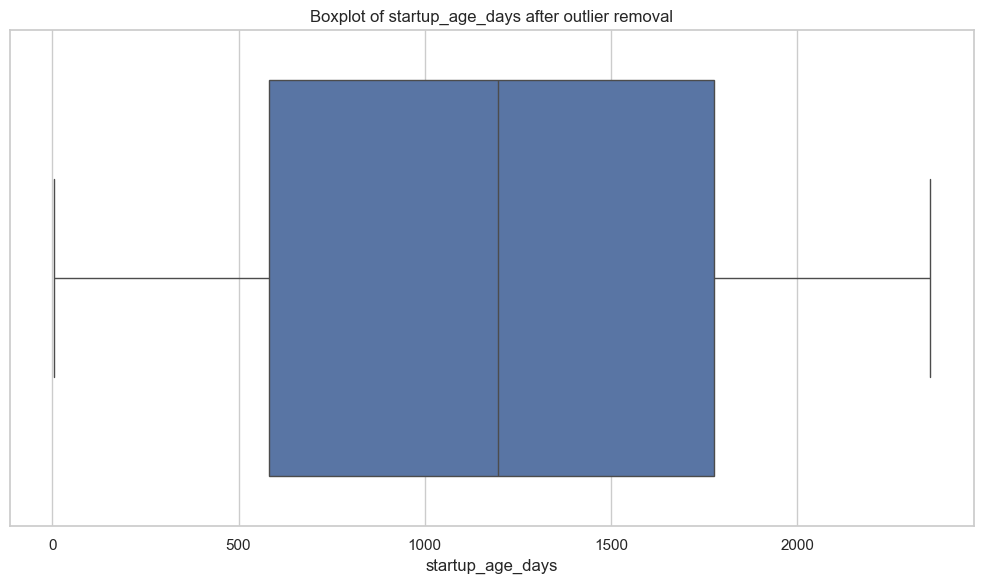

In [251]:
# boxplot after outlier handling
for column in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column} after outlier removal')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()
    

In [252]:
# print maximum and minimum values of numerical features
for column in numerical_features:
    max_value = df[column].max()
    min_value = df[column].min()
    print(f"Maximum value of {column}: {max_value}")
    print(f"Minimum value of {column}: {min_value}")
    
    

Maximum value of team_size: 996
Minimum value of team_size: 1
Maximum value of num_rounds: 10
Minimum value of num_rounds: 0
Maximum value of total_funding_usd: 99241737.89
Minimum value of total_funding_usd: 0.0
Maximum value of avg_round_usd: 16540289.65
Minimum value of avg_round_usd: 35290.69
Maximum value of num_founders: 5
Minimum value of num_founders: 1
Maximum value of avg_founder_exits: 2.98
Minimum value of avg_founder_exits: 0.0
Maximum value of tweet_count_last_7d: 495
Minimum value of tweet_count_last_7d: 0
Maximum value of startup_age_days: 2357
Minimum value of startup_age_days: 4


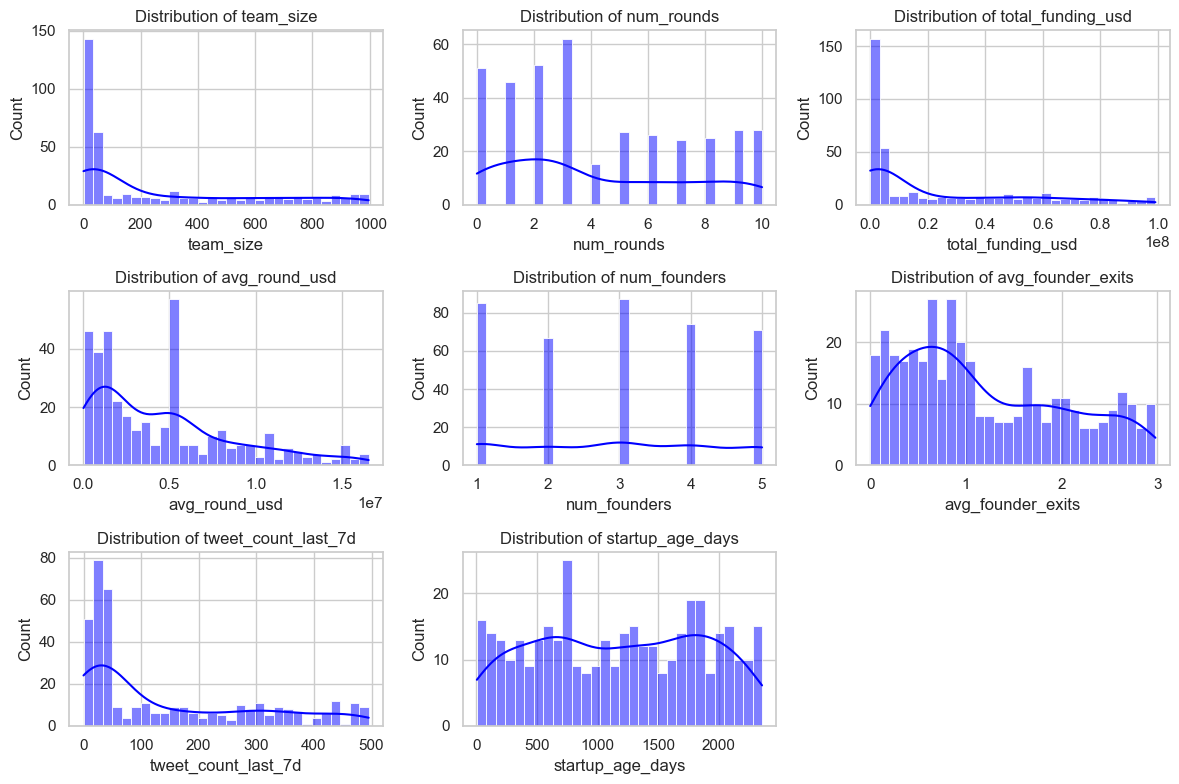

In [253]:
# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

In [254]:
# print value counts for categorical features
for column in categorical_features:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())    


Value counts for domain_category:
domain_category
FinTech           99
Sustainability    96
Biotech           95
AI                94
Name: count, dtype: int64

Value counts for name:
name
sustainability-startup-084    1
sustainability-startup-083    1
sustainability-startup-082    1
sustainability-startup-081    1
sustainability-startup-080    1
                             ..
ai-startup-005                1
ai-startup-004                1
ai-startup-003                1
ai-startup-002                1
ai-startup-001                1
Name: count, Length: 384, dtype: int64

Value counts for permalink:
permalink
sustainability-startup-084    1
sustainability-startup-083    1
sustainability-startup-082    1
sustainability-startup-081    1
sustainability-startup-080    1
                             ..
ai-startup-005                1
ai-startup-004                1
ai-startup-003                1
ai-startup-002                1
ai-startup-001                1
Name: count, Length: 384, dt

In [255]:
# balancing Target variable
from sklearn.utils import resample
# Separate majority and minority classes using correct label values
majority = df[df['label'] == 'unsuccessful']
minority = df[df['label'] == 'successful']
# Upsample minority class
minority_upsampled = resample(minority,
                                replace=True,     # sample with replacement
                                n_samples=len(majority),    # to match majority class
                                random_state=42) # reproducible results
# Combine majority class with upsampled minority class
df_balanced = pd.concat([majority, minority_upsampled])
# Display the new class counts
print("\nClass counts after balancing:")
print(df_balanced['label'].value_counts())



Class counts after balancing:
label
unsuccessful    200
successful      200
Name: count, dtype: int64


In [256]:
df_balanced

,domain_category,name,permalink,company_domain,founded_on,operating_status,team_size,num_rounds,total_funding_usd,avg_round_usd,num_founders,avg_founder_exits,tweet_count_last_7d,startup_age_days,has_ipo,has_acquisition,label
50,AI,ai-startup-051,ai-startup-051,aistartup051.com,2023-12-05,closed,14,2,3253718.87,1.626859e+06,4,0.61,48,559,False,False,unsuccessful
51,AI,ai-startup-052,ai-startup-052,aistartup052.com,2020-08-09,closed,19,0,0.00,5.316253e+06,2,0.11,47,1772,False,False,unsuccessful
52,AI,ai-startup-053,ai-startup-053,aistartup053.com,2020-12-01,closed,9,0,0.00,5.316253e+06,3,0.71,28,1658,False,False,unsuccessful
53,AI,ai-startup-054,ai-startup-054,aistartup054.com,2020-05-21,closed,39,3,4530225.77,1.510075e+06,3,0.78,34,1852,False,False,unsuccessful
54,AI,ai-startup-055,ai-startup-055,aistartup055.com,2020-09-12,closed,43,2,797291.78,3.986459e+05,5,0.48,18,1738,False,False,unsuccessful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Biotech,biotech-startup-042,biotech-startup-042,biotechstartup042.com,2023-11-11,active,151,7,60120360.39,8.588623e+06,4,1.31,486,583,False,True,successful
109,FinTech,fintech-startup-010,fintech-startup-010,fintechstartup010.com,2025-02-02,active,582,7,93933886.79,1.341913e+07,4,1.44,458,134,False,True,successful
143,FinTech,fintech-startup-044,fintech-startup-044,fintechstartup044.com,2021-08-30,active,925,7,76627000.02,1.094671e+07,2,1.04,162,1386,False,True,successful
240,Biotech,biotech-startup-041,biotech-startup-041,biotechstartup041.com,2019-06-23,active,592,9,32508802.56,3.612089e+06,1,1.54,340,2185,True,False,successful


In [257]:
# remove unnecessary columns
columns_to_remove = ['permalink','company_domain']
df_balanced.drop(columns=columns_to_remove, inplace=True)
df_balanced

,domain_category,name,founded_on,operating_status,team_size,num_rounds,total_funding_usd,avg_round_usd,num_founders,avg_founder_exits,tweet_count_last_7d,startup_age_days,has_ipo,has_acquisition,label
50,AI,ai-startup-051,2023-12-05,closed,14,2,3253718.87,1.626859e+06,4,0.61,48,559,False,False,unsuccessful
51,AI,ai-startup-052,2020-08-09,closed,19,0,0.00,5.316253e+06,2,0.11,47,1772,False,False,unsuccessful
52,AI,ai-startup-053,2020-12-01,closed,9,0,0.00,5.316253e+06,3,0.71,28,1658,False,False,unsuccessful
53,AI,ai-startup-054,2020-05-21,closed,39,3,4530225.77,1.510075e+06,3,0.78,34,1852,False,False,unsuccessful
54,AI,ai-startup-055,2020-09-12,closed,43,2,797291.78,3.986459e+05,5,0.48,18,1738,False,False,unsuccessful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Biotech,biotech-startup-042,2023-11-11,active,151,7,60120360.39,8.588623e+06,4,1.31,486,583,False,True,successful
109,FinTech,fintech-startup-010,2025-02-02,active,582,7,93933886.79,1.341913e+07,4,1.44,458,134,False,True,successful
143,FinTech,fintech-startup-044,2021-08-30,active,925,7,76627000.02,1.094671e+07,2,1.04,162,1386,False,True,successful
240,Biotech,biotech-startup-041,2019-06-23,active,592,9,32508802.56,3.612089e+06,1,1.54,340,2185,True,False,successful


In [258]:
df_balanced.shape

(400, 15)

In [259]:
# convert startup_age_days to years
df_balanced['startup_age_years'] = df_balanced['startup_age_days'] / 365
# drop startup_age_days column
df_balanced.drop(columns=['startup_age_days'], inplace=True)
# Display the updated DataFrame
print("\nDataFrame after converting startup_age_days to years:")
print(df_balanced.head())


DataFrame after converting startup_age_days to years:
   domain_category            name  founded_on operating_status  team_size  \
50              AI  ai-startup-051  2023-12-05           closed         14   
51              AI  ai-startup-052  2020-08-09           closed         19   
52              AI  ai-startup-053  2020-12-01           closed          9   
53              AI  ai-startup-054  2020-05-21           closed         39   
54              AI  ai-startup-055  2020-09-12           closed         43   

    num_rounds  total_funding_usd  avg_round_usd  num_founders  \
50           2         3253718.87   1.626859e+06             4   
51           0               0.00   5.316253e+06             2   
52           0               0.00   5.316253e+06             3   
53           3         4530225.77   1.510075e+06             3   
54           2          797291.78   3.986459e+05             5   

    avg_founder_exits  tweet_count_last_7d  has_ipo  has_acquisition  \
50     

In [260]:
# check if startup_age_years has any zero or less than zero values
zero_or_negative_age = df_balanced[df_balanced['startup_age_years'] <= 0]
if not zero_or_negative_age.empty:
    print("\nStartup age has zero or negative values:")
    print(zero_or_negative_age)
else:
    print("\nNo startups with zero or negative age found.")
    



No startups with zero or negative age found.


In [261]:
# Funding_Velocity = total_funding_usd / startup_age_years
df_balanced['funding_velocity'] = df_balanced['total_funding_usd'] / df_balanced['startup_age_years']

# Drop the 'total_funding_usd' and 'startup_age_years' columns as they are no longer needed
df_balanced.drop(columns=['total_funding_usd', 'startup_age_years'], inplace=True)
df_balanced
 

,domain_category,name,founded_on,operating_status,team_size,num_rounds,avg_round_usd,num_founders,avg_founder_exits,tweet_count_last_7d,has_ipo,has_acquisition,label,funding_velocity
50,AI,ai-startup-051,2023-12-05,closed,14,2,1.626859e+06,4,0.61,48,False,False,unsuccessful,2.124521e+06
51,AI,ai-startup-052,2020-08-09,closed,19,0,5.316253e+06,2,0.11,47,False,False,unsuccessful,0.000000e+00
52,AI,ai-startup-053,2020-12-01,closed,9,0,5.316253e+06,3,0.71,28,False,False,unsuccessful,0.000000e+00
53,AI,ai-startup-054,2020-05-21,closed,39,3,1.510075e+06,3,0.78,34,False,False,unsuccessful,8.928361e+05
54,AI,ai-startup-055,2020-09-12,closed,43,2,3.986459e+05,5,0.48,18,False,False,unsuccessful,1.674404e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Biotech,biotech-startup-042,2023-11-11,active,151,7,8.588623e+06,4,1.31,486,False,True,successful,3.763968e+07
109,FinTech,fintech-startup-010,2025-02-02,active,582,7,1.341913e+07,4,1.44,458,False,True,successful,2.558647e+08
143,FinTech,fintech-startup-044,2021-08-30,active,925,7,1.094671e+07,2,1.04,162,False,True,successful,2.017955e+07
240,Biotech,biotech-startup-041,2019-06-23,active,592,9,3.612089e+06,1,1.54,340,True,False,successful,5.430532e+06


# next steps
# Trained and saved model + metrics report.